### Clustering: k-means and linkage-based clustering

In this notebook we are going to practice with the k-means and the linkage-based (called "agglomerative" in sklearn) clustering algorithms.

In particular you are going to implement the k-means algorithm from scratch and to compare the results with the implementation already present in the sklearn library.

In [1]:
#load the required packages
%matplotlib inline  

import numpy as np
import scipy as sp
import imageio as imio
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

from mpl_toolkits.mplot3d import Axes3D #3d plotting functions
from matplotlib import pyplot
from PIL import Image

from copy import deepcopy  #deepcopy ensures that a copy of all the object data is performed (not just the pointers)

## TO DO:
    
Place your ID number in the ID variable, it will be used as random seed (as usual the random seed can affect a little bit the results)

In [2]:
# fix your ID ("numero di matricola") and the seed for random generator
ID = 1205459  #insert your ID number here
np.random.seed(ID)

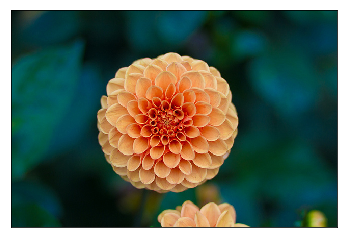

Flower image:  (427, 640, 3)


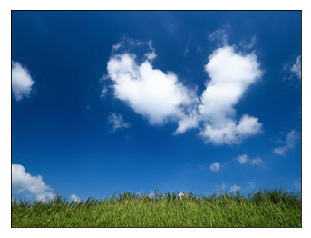

Landscape image:  (240, 320, 3)


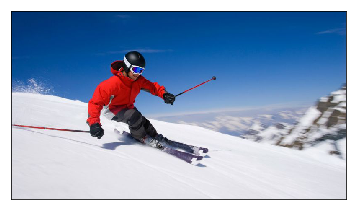

Skiing image:  (451, 800, 3)


In [3]:
# load the images and display them
flower = load_sample_image('flower.jpg')
landscape = imio.imread("data/landscape.jpg")
skiing = imio.imread("data/skiing.jpg")

ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower)
plt.show()
print("Flower image: ",flower.shape)

ax2 = plt.axes(xticks=[], yticks=[])
ax2.imshow(landscape)
plt.show()
print("Landscape image: ",landscape.shape)

ax3 = plt.axes(xticks=[], yticks=[])
ax3.imshow(skiing)
plt.show()
print("Skiing image: ",skiing.shape)

We are going to start by using the flower image. It will be rescaled of a factor 8 to speed up the computation.


(53, 80, 3)


/home/tommaso/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


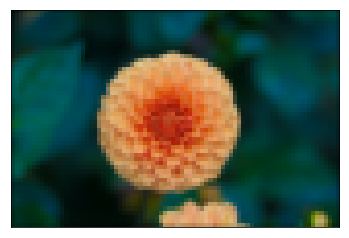

In [4]:
# Rescale the image of a factor of 8
# The anti-aliasing can be enabled for better performances but requires a recent version of the python packages

flower_rescaled = rescale(flower, 1.0 / 8.0, anti_aliasing=True, multichannel=True) #new versions
#flower_rescaled = rescale(flower, 1.0 / 8.0)  # better compatibility

# Firstly, we are going to visualize the rescaled version
print(flower_rescaled.shape)
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower_rescaled);

In [5]:
# reshape the data to a matrix of num_pixels x 3

data_rescaled = flower_rescaled.reshape(flower_rescaled.shape[0]*flower_rescaled.shape[1], 3)

print(data_rescaled.shape)
print(data_rescaled)

(4240, 3)
[[0.01672216 0.06389197 0.0491306 ]
 [0.0491306  0.10022198 0.08061413]
 [0.10714021 0.14739179 0.12282649]
 ...
 [0.16204218 0.25049945 0.04716981]
 [0.02156863 0.15719571 0.06481687]
 [0.01176471 0.12963374 0.06677765]]


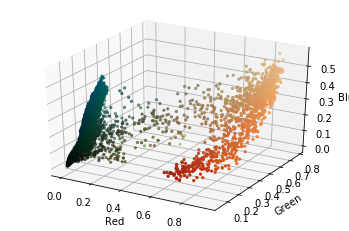

In [6]:
# Plot the points in the 3-dimensional space with normalized intervals between 0 and 1
# (corresponding to the three channels of the image, i.e. Red Green and Blue)



fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
r, g, b = list(data_rescaled[:,0]), list(data_rescaled[:,1]), list(data_rescaled[:,2])

axis.scatter(r, g, b, c=data_rescaled, s=5, marker="o")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
pyplot.show()

In [7]:
data_rescaled

array([[0.01672216, 0.06389197, 0.0491306 ],
       [0.0491306 , 0.10022198, 0.08061413],
       [0.10714021, 0.14739179, 0.12282649],
       ...,
       [0.16204218, 0.25049945, 0.04716981],
       [0.02156863, 0.15719571, 0.06481687],
       [0.01176471, 0.12963374, 0.06677765]])

## TO DO 1
Implement the k-means algorithm manually (do not use the kmeans function of sklearn). The inputs to the function is the set of vectors to be clustered and the number of clusters. The output must contain the clusters barycenters, a vector associating each data point to the corresponding cluster and the error at each iteration.
Additionally, fix a maximum number of iterations of the k-means algorithm (e.g., 50).

In [8]:
def my_kmeans(points, k):
    max_iters = 50
    # max_iters = 10
    
    #ADD YOUR CODE HERE
    
    clusters = []
    dist_list = []
    error = []
    
    # RANDOM CENTROIDS
    centroids = np.random.rand(k, 3);
    
    # PRIOR KNOWLEDGE INITIALIZATION: ONE CENTROID FOR EACH COLOR: RED, GREEN, BLUE
    #centroids = np.array([1., 0., 0.], [0., 1., 0.], [0., 0., 1.])
    
    
    # Start iterating

    count = 1

    while count <= max_iters:
        clusters = [ [] for i in range(k)]
        dist_list = np.array([])

        # Searching for minimum distance to "regroup" in clusters
        for v in points:
            dist_list = []
            for c in centroids:
                dist_list.append(np.linalg.norm(c-v))
#            clusters[np.argmin(dist_list)].append(v.tolist())
            clusters[np.argmin(dist_list)].append(v)
    
        # New centroids: updating
        for i in range(k):
            temp_cent = np.array([0., 0., 0.])

            for v in clusters[i]:
                temp_cent[0] += v[0]
                temp_cent[1] += v[1]
                temp_cent[2] += v[2]

            centroids[i] = temp_cent / len(clusters[i])
    
        #Evalulating error
        error_iter = 0
        for ele in points:
            error_iter += min([np.linalg.norm(ele-c) for c in centroids])
        error.append(error_iter)
        
        # printing results during each iteration
        #print("\n\nIteration: ", count, "\nCentres: ", centroids , "\nError: ", error_iter)
        
        count += 1
    
    return centroids, clusters, error



## TO DO 2:

Now try the function you developed on the flower image with two clusters (k=2). 

Then plot the data points in the 3-dimensional space, each point must be coloured based on the membership to one or the other cluster. Additionally, plot the respective clusters centroids (use a different shape, size or color to highlight the centroids).

[[0.795154   0.50481978 0.2940744 ]
 [0.02246513 0.21031087 0.19325467]]


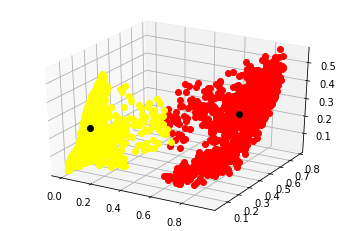

In [9]:
mykmeans_centers, clusters, error = my_kmeans(data_rescaled, 2)

#ADD CODE FOR PLOTTING HERE

fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
colors = ["#ff0000", "#ffff00", "#0000ff", "#00ff00", "#ff00ff", "#00ffff", "#ff8800", "#ff6666"]


# Preparing vectors to plot (I tried many times but I couldn't slice the "clusters" matrix, probably because there are lists with different dimensions)
r_plot = []
g_plot = []
b_plot = []

for i in range(len(clusters)):
    r_plot.append([])
    g_plot.append([])
    b_plot.append([])

for cluster_cont in range(len(clusters)):
    for i in range(len(clusters[cluster_cont])):
        r_plot[cluster_cont].append(clusters[cluster_cont][i][0])
        g_plot[cluster_cont].append(clusters[cluster_cont][i][1])
        b_plot[cluster_cont].append(clusters[cluster_cont][i][2])

# plotting (with customized colors if enough, otherwise with default ones)
for cluster_cont in range(len(clusters)):
    if len(clusters) <= len(colors):
        axis.plot(r_plot[cluster_cont], g_plot[cluster_cont], b_plot[cluster_cont], 'o', c=colors[cluster_cont])
    else:
        axis.plot(r_plot[cluster_cont], g_plot[cluster_cont], b_plot[cluster_cont], 'o')

# Plotting centroids
print(mykmeans_centers)
# Creating centroids coordinates lists: for z coordinate the function plot makes confusions with z coordinates
x_cent, y_cent, z_cent = [], [], []
for point in mykmeans_centers:
    x_cent.append(point[0])
    y_cent.append(point[1])
    z_cent.append(point[2])

axis.plot(x_cent, y_cent, z_cent, 'ko')

plt.show()

## TO DO 3: 
Plot the value of the error versus the number of iterations

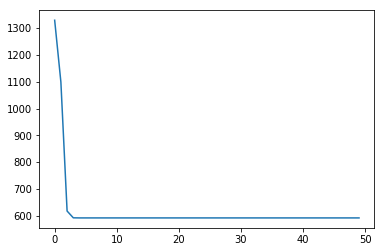

In [10]:
#ADD CODE FOR PLOTTING HERE
#print(error)
plt.plot(error)

## TO DO 4:
Now use the k-means function provided in sklearn. Pass to the function the number of clusters and use multiple random initializations (n_init parameter). Go to the documentation page for further details

In [11]:
num_clust = 2

kmeans = KMeans(n_clusters=num_clust, n_init=10)

#ADD YOR CODE

res = kmeans.fit(data_rescaled)

print("My centers:\n", mykmeans_centers, "\n\n")
print("Sklearn centers:\n", res.cluster_centers_)


My centers:
 [[0.795154   0.50481978 0.2940744 ]
 [0.02246513 0.21031087 0.19325467]] 


Sklearn centers:
 [[0.795154   0.50481978 0.2940744 ]
 [0.02246513 0.21031087 0.19325467]]


## TO DO 5:
Perform the same plot as above but with the output of the k-means function provided in sklearn.

[[0.795154   0.50481978 0.2940744 ]
 [0.02246513 0.21031087 0.19325467]]


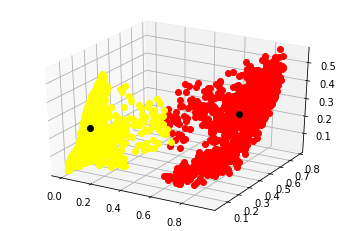

In [12]:
#ADD CODE FOR PLOTTING HERE
clusters_sk = [[] for i in range(num_clust)]

# Building clusters lists
for i in range(len(res.labels_)):
    clusters_sk[res.labels_[i]].append(data_rescaled[i])


# COPYING MY PREVIOUS CODE TO PLOT (changing useful names)

fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
colors = ["#ff0000", "#ffff00", "#0000ff", "#00ff00", "#ff00ff", "#00ffff", "#ff8800", "#ff6666"]

# Preparing vectors to plot
r_plot = []
g_plot = []
b_plot = []

for i in range(len(clusters_sk)):
    r_plot.append([])
    g_plot.append([])
    b_plot.append([])

for cluster_cont in range(len(clusters_sk)):
    for i in range(len(clusters_sk[cluster_cont])):
        r_plot[cluster_cont].append(clusters_sk[cluster_cont][i][0])
        g_plot[cluster_cont].append(clusters_sk[cluster_cont][i][1])
        b_plot[cluster_cont].append(clusters_sk[cluster_cont][i][2])

# plotting (with customized colors if enough, otherwise with default ones)
for cluster_cont in range(len(clusters_sk)):
    if len(clusters_sk) <= len(colors):
        axis.plot(r_plot[cluster_cont], g_plot[cluster_cont], b_plot[cluster_cont], 'o', c=colors[cluster_cont])
    else:
        axis.plot(r_plot[cluster_cont], g_plot[cluster_cont], b_plot[cluster_cont], 'o')

# Plotting centroids
print(res.cluster_centers_)
# Creating centroids coordinates lists: for z coordinate the function plot makes confusions with z coordinates
x_cent, y_cent, z_cent = [], [], []
for point in res.cluster_centers_:
    x_cent.append(point[0])
    y_cent.append(point[1])
    z_cent.append(point[2])

axis.plot(x_cent, y_cent, z_cent, 'ko')

plt.show()

## Question 1: 

Compare the results obtained with your implementation and with k-means from sklearn. Do you observe any differences, i.e., do the two plot matches? 

### Answer:
They seem the same clusters; to verify it let us plot the 2 centroids and the dimensions of the clusters.

In [13]:
print("My centers:\n", mykmeans_centers, "\n\n")
print("Sklearn centers:\n", res.cluster_centers_)

print("\n\n", "Dimensions of my clusters:")
for i in range(len(clusters)):
    print("\n", len(clusters[i]))


print("\n\n", "Dimensions of skl algorithm clusters:")
for i in range(len(clusters_sk)):
    print("\n", len(clusters_sk[i]))

My centers:
 [[0.795154   0.50481978 0.2940744 ]
 [0.02246513 0.21031087 0.19325467]] 


Sklearn centers:
 [[0.795154   0.50481978 0.2940744 ]
 [0.02246513 0.21031087 0.19325467]]


 Dimensions of my clusters:

 1041

 3199


 Dimensions of skl algorithm clusters:

 1041

 3199


## TO DO 6:

Now display the segmented image based on the two clusters found above with the k-means functions by sklearn. Notice that for proper visualization you need to reshape the array back to the original 2D image size

(53, 80, 3)


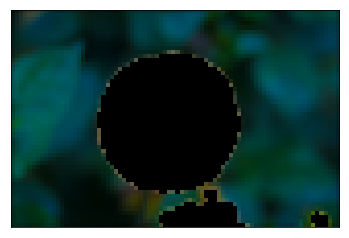

(53, 80, 3)


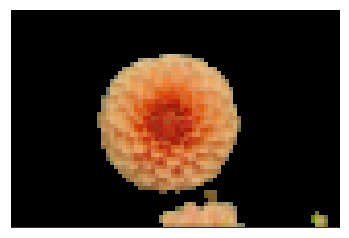

In [14]:
#ADD YOUR CODE HERE

cluster_1_plot = data_rescaled.copy()
cluster_2_plot = data_rescaled.copy()

#cluster_1_check = np.array(clusters_sk[0])
#cluster_2_check = np.array(clusters_sk[1])
#print(cluster_1.shape)

for i in range(len(res.labels_)):
    
#    if cluster_1[i] in clusters_sk[0]:
#    if (cluster_1_check.any(cluster_1_plot[i])):

    # ASSUMING THE LABELS ARE IN THE SAME ORDER W.R.T. THE LABELLED POINTS
    if res.labels_[i] == 0:
        cluster_1_plot[i] = [0., 0., 0.]    # Putting BLACK color to "negate" all points but those of the cluster
    if res.labels_[i] == 1:
        cluster_2_plot[i] = [0., 0., 0.]    # Putting BLACK color to "negate" all points but those of the cluster

cluster_1_plot = cluster_1_plot.reshape(53, 80, 3)
cluster_2_plot = cluster_2_plot.reshape(53, 80, 3)

print(cluster_1_plot.shape)
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(cluster_1_plot);
plt.show()

print(cluster_2_plot.shape)
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(cluster_2_plot)
plt.show()

## Question 2: 

What do you observe? Do you think clustering could be useful for image segmentation ? And for image compression? Comment your answer.

### Answer

One can notice that the "expected cut" (the separation between the flower and the background) in the image has been done by the clustering algorithm.

I think that it can be very useful in image segmentation beacause, as written above, the image has been "divided" in the 2 "expected" sections, the flower and the background.

I think it can be useful for image compression, but for now I have no idea on how one can use clustering to do it.

## TO DO 7:

Now perform again the clustering with the non-rescaled image, using the method provided by sklearn. Plot again: the 3-dimensional points, the 3-dimensional points with color based on membership, the segmented image.

(427, 640, 3)
(273280, 3)


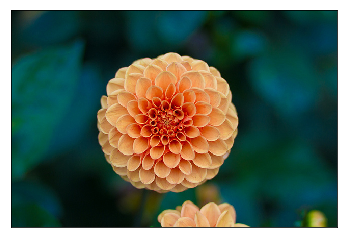

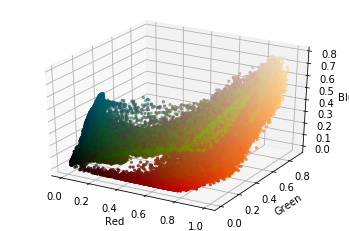

My centers:
 [[0.795154   0.50481978 0.2940744 ]
 [0.02246513 0.21031087 0.19325467]] 


Sklearn centers:
 [[0.0252104  0.21208228 0.19545371]
 [0.82540994 0.53242036 0.31307987]]


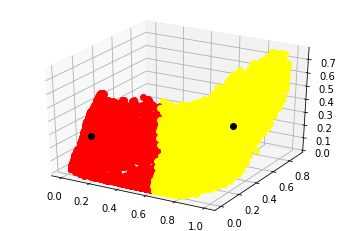

(427, 640, 3)


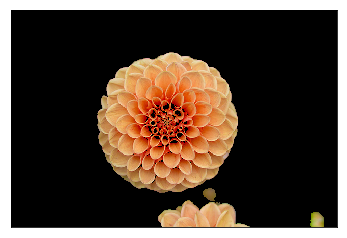

(427, 640, 3)


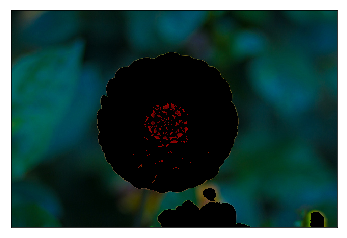

In [15]:
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);
print(flower.shape)

data = flower.reshape(flower.shape[0]*flower.shape[1], 3)
data=data/255.0
print(data.shape)


fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d") # 3D plot with scalar values in each axis

r, g, b = list(data[:,0]), list(data[:,1]), list(data[:,2])


axis.scatter(r, g, b, c=data, s=5, marker="o")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
pyplot.show()

#ADD YOUR CODE HERE

# (coying from previous cells)

# ALGORITHM

num_clust = 2

kmeans = KMeans(n_clusters=num_clust, n_init=10)

res = kmeans.fit(data)

print("My centers:\n", mykmeans_centers, "\n\n")
print("Sklearn centers:\n", res.cluster_centers_)


# PLOTTING

clusters_sk = [[] for i in range(num_clust)]

# Building clusters lists
for i in range(len(res.labels_)):
    clusters_sk[res.labels_[i]].append(data[i])


# COPYING MY PREVIOUS CODE TO PLOT (changing useful names)

fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
colors = ["#ff0000", "#ffff00", "#0000ff", "#00ff00", "#ff00ff", "#00ffff", "#ff8800", "#ff6666"]

# Preparing vectors to plot
r_plot = []
g_plot = []
b_plot = []

for i in range(len(clusters_sk)):
    r_plot.append([])
    g_plot.append([])
    b_plot.append([])

for cluster_cont in range(len(clusters_sk)):
    for i in range(len(clusters_sk[cluster_cont])):
        r_plot[cluster_cont].append(clusters_sk[cluster_cont][i][0])
        g_plot[cluster_cont].append(clusters_sk[cluster_cont][i][1])
        b_plot[cluster_cont].append(clusters_sk[cluster_cont][i][2])

# plotting (with customized colors if enough, otherwise with default ones)
for cluster_cont in range(len(clusters_sk)):
    if len(clusters_sk) <= len(colors):
        axis.plot(r_plot[cluster_cont], g_plot[cluster_cont], b_plot[cluster_cont], 'o', c=colors[cluster_cont])
    else:
        axis.plot(r_plot[cluster_cont], g_plot[cluster_cont], b_plot[cluster_cont], 'o')

# Plotting centroids
#print(res.cluster_centers_)

# Creating centroids coordinates lists: for z coordinate the function "plot" makes confusions with z coordinates
x_cent, y_cent, z_cent = [], [], []
for point in res.cluster_centers_:
    x_cent.append(point[0])
    y_cent.append(point[1])
    z_cent.append(point[2])

axis.plot(x_cent, y_cent, z_cent, 'ko')

plt.show()


# PLOTTING CLUSTERS

cluster_1_plot = data.copy()
cluster_2_plot = data.copy()

#cluster_1_check = np.array(clusters_sk[0])
#cluster_2_check = np.array(clusters_sk[1])
#print(cluster_1.shape)

for i in range(len(res.labels_)):
    # ASSUMING THE LABELS ARE IN THE SAME ORDER W.R.T. THE LABELLED POINTS
    if res.labels_[i] == 0:
        cluster_1_plot[i] = [0., 0., 0.]    # Putting BLACK color to "negate" all points but those of the cluster
    if res.labels_[i] == 1:
        cluster_2_plot[i] = [0., 0., 0.]    # Putting BLACK color to "negate" all points but those of the cluster

cluster_1_plot = cluster_1_plot.reshape(427, 640, 3)
cluster_2_plot = cluster_2_plot.reshape(427, 640, 3)

print(cluster_1_plot.shape)
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(cluster_1_plot);
plt.show()

print(cluster_2_plot.shape)
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(cluster_2_plot)
plt.show()

## Question 3: explain what do you observe

### Answer
One can notice that, as before, the "expected cut" (the separation between the flower and the background) in the image has been done by the clustering algorithm.

(It is not perfect; one may expect that the inner red points still belong to the flower while in this case they are assigned to "the ground"; this may be fixed changing the colors of the ground or changing the clustering algorithm.)

## TO DO 8:

Now load the landscape image (optional: try also with the skiing image), resize of a factor of 8 and segment it using kmeans with k varying from 2 to 15 clusters. You can use the sklearn implementation.

Then plot the resulting data points in the 3-dimensional space, each point must be colored based on the cluster membership. 
Additionally, plot the respective clusters centroids.



(30, 40, 3)
(1200, 3)




---------- ---------- ---------- ---------- ----------


CLUSTERING WITH 2 CLUSTERS:



/home/tommaso/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
/home/tommaso/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/tommaso/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


2
Clusters centroids are:
 [[0.12135752 0.33842738 0.50719937]
 [0.75589396 0.8096705  0.88553777]]


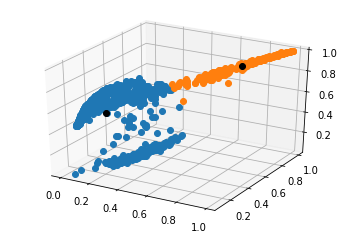


Plot of cluster number 1

(30, 40, 3)


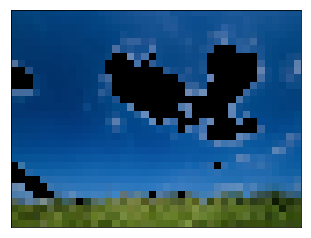


Plot of cluster number 2

(30, 40, 3)


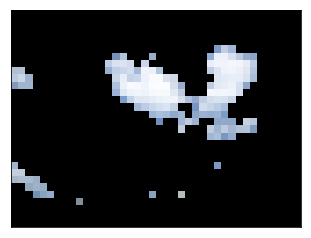



---------- Error:  63.72968519898973 








---------- ---------- ---------- ---------- ----------


CLUSTERING WITH 3 CLUSTERS:

3
Clusters centroids are:
 [[0.08628916 0.32947487 0.57345504]
 [0.75589396 0.8096705  0.88553777]
 [0.31085739 0.38680429 0.14917184]]


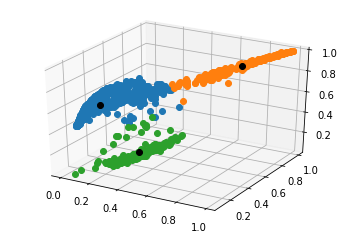


Plot of cluster number 1

(30, 40, 3)


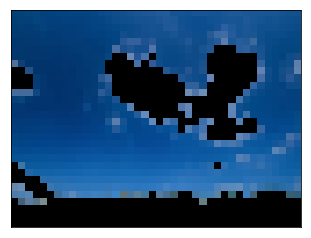


Plot of cluster number 2

(30, 40, 3)


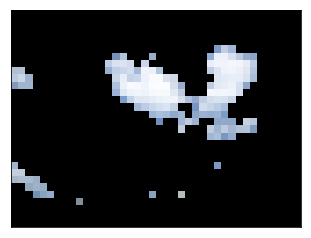


Plot of cluster number 3

(30, 40, 3)


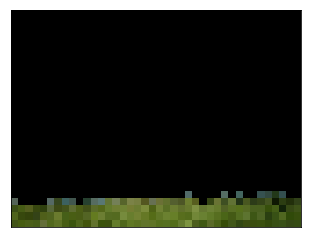



---------- Error:  31.974990209262817 








---------- ---------- ---------- ---------- ----------


CLUSTERING WITH 4 CLUSTERS:

4
Clusters centroids are:
 [[0.04097463 0.28799247 0.53645207]
 [0.7769764  0.82619583 0.89662171]
 [0.31059436 0.38628676 0.14724877]
 [0.23086787 0.45650285 0.68228262]]


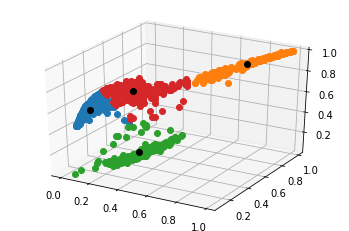


Plot of cluster number 1

(30, 40, 3)


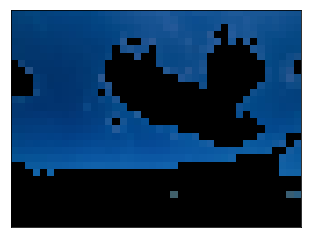


Plot of cluster number 2

(30, 40, 3)


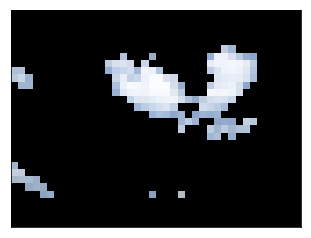


Plot of cluster number 3

(30, 40, 3)


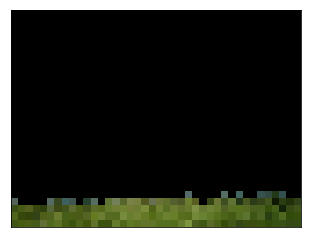


Plot of cluster number 4

(30, 40, 3)


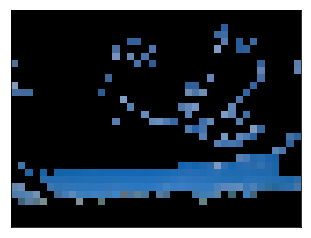



---------- Error:  18.241289381243305 








---------- ---------- ---------- ---------- ----------


CLUSTERING WITH 5 CLUSTERS:

5
Clusters centroids are:
 [[0.59464759 0.68157128 0.79648914]
 [0.03757526 0.28298722 0.53033903]
 [0.31059436 0.38628676 0.14724877]
 [0.863775   0.89508814 0.94318677]
 [0.19678143 0.43627071 0.67335841]]


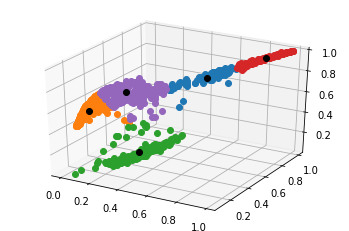


Plot of cluster number 1

(30, 40, 3)


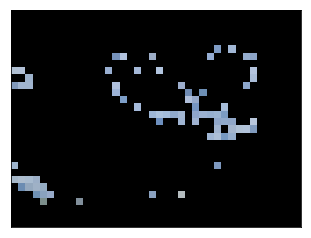


Plot of cluster number 2

(30, 40, 3)


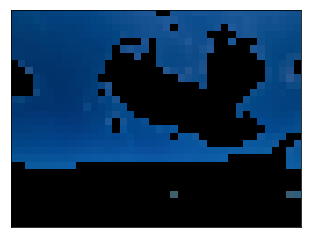


Plot of cluster number 3

(30, 40, 3)


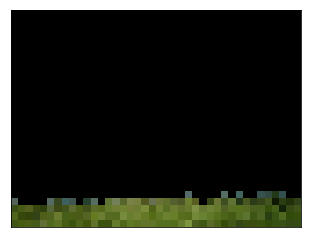


Plot of cluster number 4

(30, 40, 3)


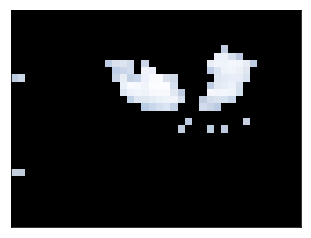


Plot of cluster number 5

(30, 40, 3)


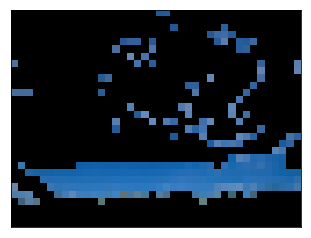



---------- Error:  13.590395591482213 








---------- ---------- ---------- ---------- ----------


CLUSTERING WITH 6 CLUSTERS:

6
Clusters centroids are:
 [[0.01506787 0.24763801 0.48554449]
 [0.60695806 0.69162582 0.8058415 ]
 [0.31059436 0.38628676 0.14724877]
 [0.23785144 0.45926445 0.6827783 ]
 [0.86644431 0.89729129 0.94469375]
 [0.07163454 0.33565662 0.59528203]]


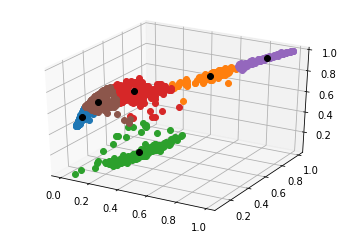


Plot of cluster number 1

(30, 40, 3)


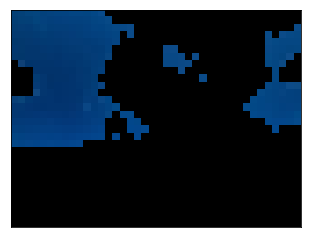


Plot of cluster number 2

(30, 40, 3)


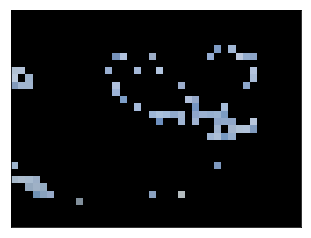


Plot of cluster number 3

(30, 40, 3)


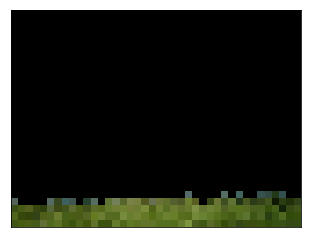


Plot of cluster number 4

(30, 40, 3)


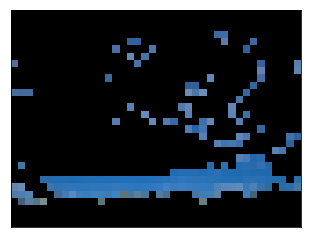


Plot of cluster number 5

(30, 40, 3)


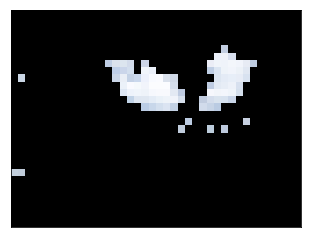


Plot of cluster number 6

(30, 40, 3)


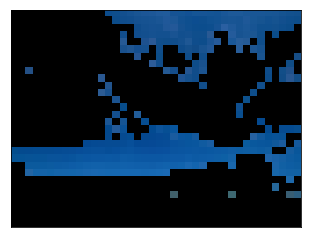



---------- Error:  10.26613961953134 








---------- ---------- ---------- ---------- ----------


CLUSTERING WITH 7 CLUSTERS:

7
Clusters centroids are:
 [[0.2453566  0.46458737 0.68582202]
 [0.6389158  0.71694348 0.82430219]
 [0.23418124 0.31070482 0.09352146]
 [0.01637198 0.25045336 0.48919302]
 [0.88961511 0.91596466 0.9570443 ]
 [0.07654426 0.33989006 0.59928312]
 [0.37634519 0.45132239 0.19347925]]


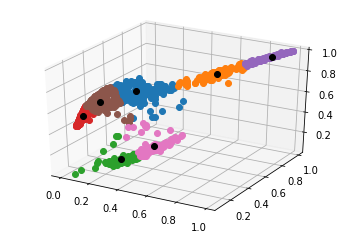


Plot of cluster number 1

(30, 40, 3)


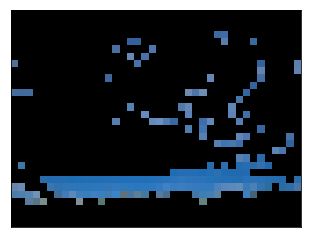


Plot of cluster number 2

(30, 40, 3)


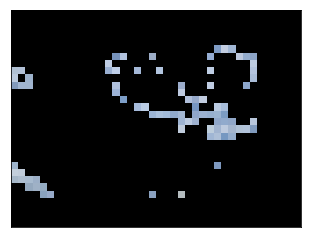


Plot of cluster number 3

(30, 40, 3)


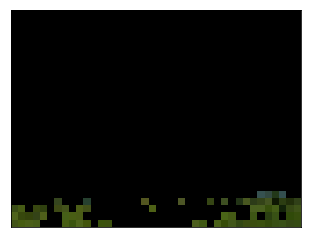


Plot of cluster number 4

(30, 40, 3)


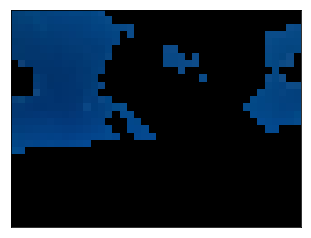


Plot of cluster number 5

(30, 40, 3)


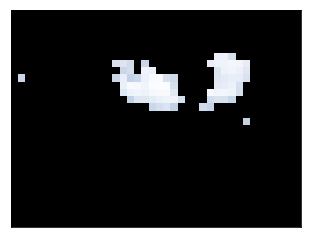


Plot of cluster number 6

(30, 40, 3)


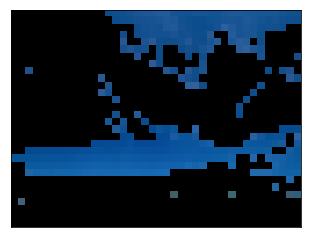


Plot of cluster number 7

(30, 40, 3)


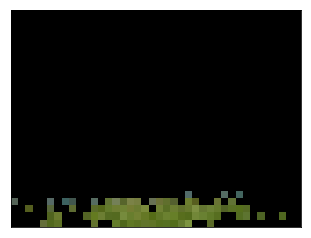



---------- Error:  8.235671910276382 








---------- ---------- ---------- ---------- ----------


CLUSTERING WITH 8 CLUSTERS:

8
Clusters centroids are:
 [[0.37838412 0.45360265 0.19622017]
 [0.89581105 0.92079195 0.9601095 ]
 [0.063937   0.32170297 0.57720231]
 [0.34392825 0.50565954 0.68322193]
 [0.23752228 0.31372549 0.09446142]
 [0.65850072 0.73226925 0.83417025]
 [0.14745935 0.41987088 0.68197035]
 [0.01334499 0.24230426 0.478116  ]]


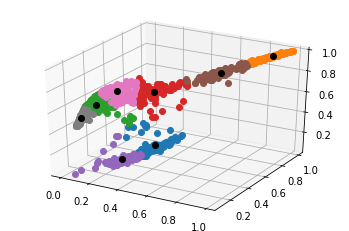


Plot of cluster number 1

(30, 40, 3)


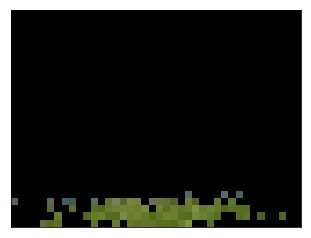


Plot of cluster number 2

(30, 40, 3)


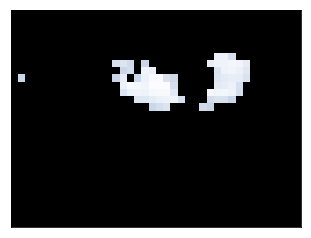


Plot of cluster number 3

(30, 40, 3)


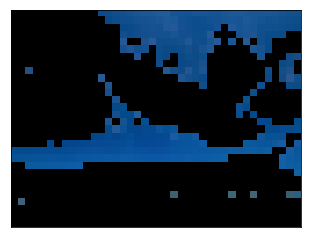


Plot of cluster number 4

(30, 40, 3)


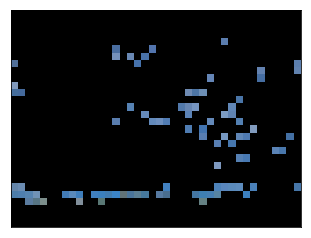


Plot of cluster number 5

(30, 40, 3)


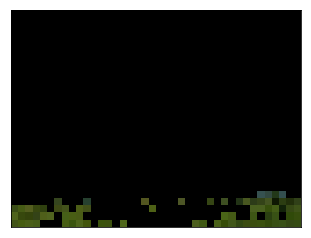


Plot of cluster number 6

(30, 40, 3)


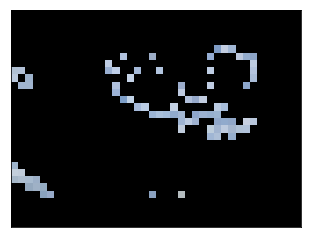


Plot of cluster number 7

(30, 40, 3)


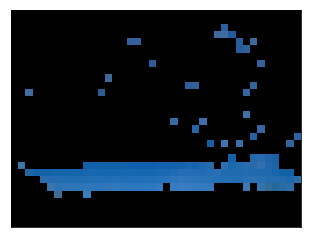


Plot of cluster number 8

(30, 40, 3)


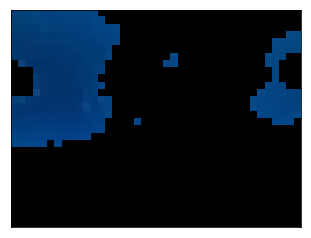



---------- Error:  6.559854956046027 








---------- ---------- ---------- ---------- ----------


CLUSTERING WITH 9 CLUSTERS:

9
Clusters centroids are:
 [[0.0640935  0.32172676 0.57774711]
 [0.91182412 0.93348188 0.96773619]
 [0.01346678 0.24262663 0.4784518 ]
 [0.37634519 0.45132239 0.19347925]
 [0.58651961 0.675773   0.79639894]
 [0.13922218 0.4183223  0.68454097]
 [0.74348448 0.79965278 0.88131127]
 [0.31964956 0.49001877 0.67298707]
 [0.23418124 0.31070482 0.09352146]]


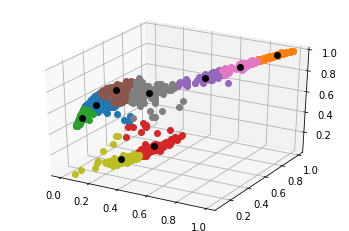


Plot of cluster number 1

(30, 40, 3)


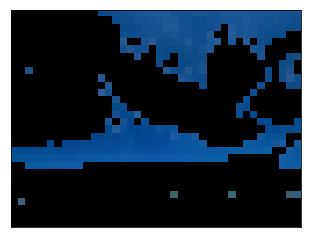


Plot of cluster number 2

(30, 40, 3)


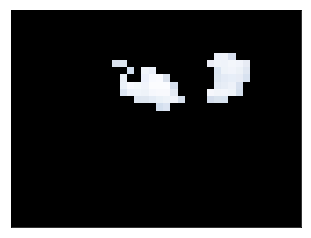


Plot of cluster number 3

(30, 40, 3)


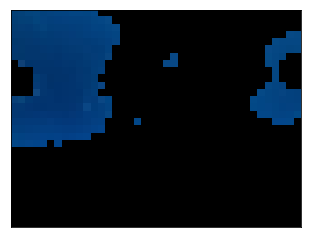


Plot of cluster number 4

(30, 40, 3)


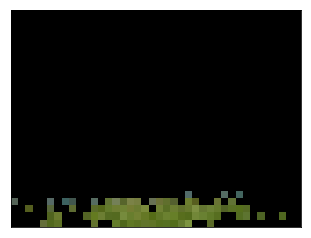


Plot of cluster number 5

(30, 40, 3)


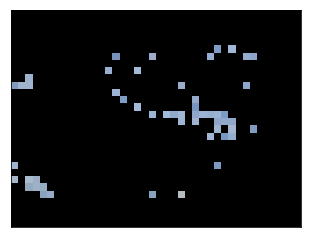


Plot of cluster number 6

(30, 40, 3)


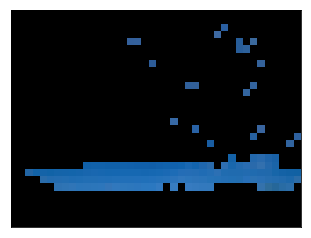


Plot of cluster number 7

(30, 40, 3)


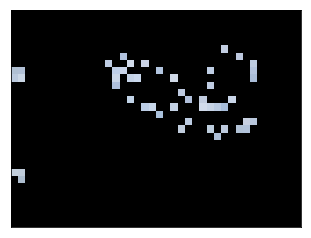


Plot of cluster number 8

(30, 40, 3)


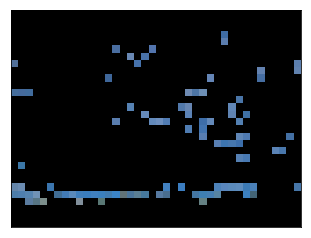


Plot of cluster number 9

(30, 40, 3)


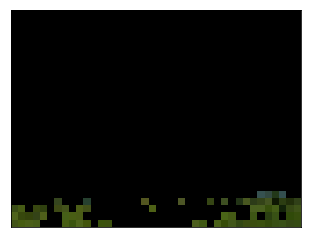



---------- Error:  5.703732890630453 








---------- ---------- ---------- ---------- ----------


CLUSTERING WITH 10 CLUSTERS:

10
Clusters centroids are:
 [[0.33849925 0.49827803 0.67408245]
 [0.01171969 0.22868647 0.45938876]
 [0.91982026 0.9395915  0.97163399]
 [0.37634519 0.45132239 0.19347925]
 [0.08387701 0.34744652 0.60599376]
 [0.59330065 0.68144517 0.79981845]
 [0.75828527 0.8115148  0.88942714]
 [0.16521451 0.43227186 0.69155978]
 [0.23418124 0.31070482 0.09352146]
 [0.03283918 0.28938567 0.54135041]]


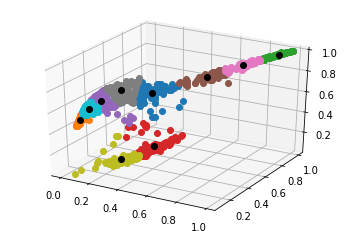


Plot of cluster number 1

(30, 40, 3)


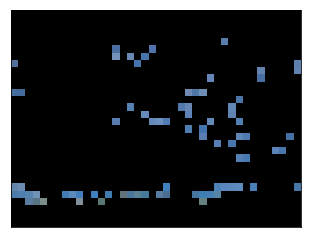


Plot of cluster number 2

(30, 40, 3)


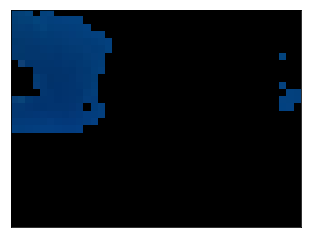


Plot of cluster number 3

(30, 40, 3)


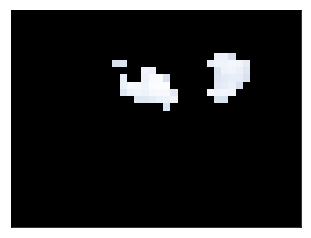


Plot of cluster number 4

(30, 40, 3)


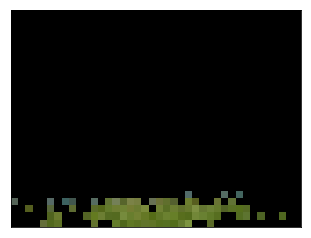


Plot of cluster number 5

(30, 40, 3)


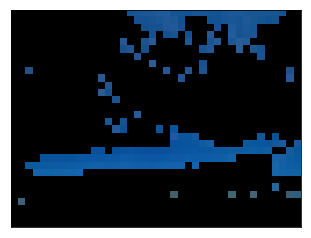


Plot of cluster number 6

(30, 40, 3)


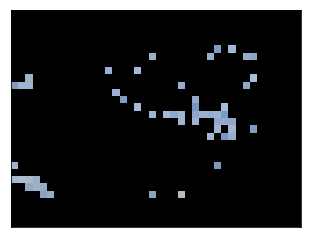


Plot of cluster number 7

(30, 40, 3)


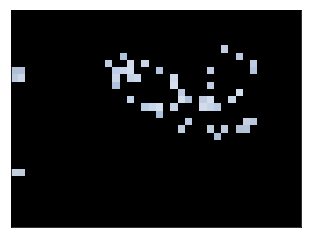


Plot of cluster number 8

(30, 40, 3)


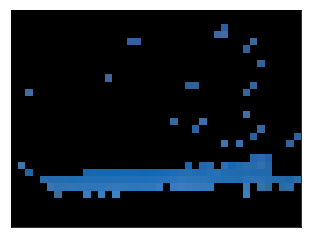


Plot of cluster number 9

(30, 40, 3)


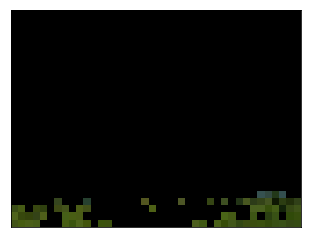


Plot of cluster number 10

(30, 40, 3)


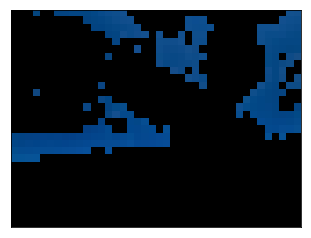



---------- Error:  4.984842094575702 








---------- ---------- ---------- ---------- ----------


CLUSTERING WITH 11 CLUSTERS:

11
Clusters centroids are:
 [[0.5918424  0.68024417 0.79885313]
 [0.0117549  0.22939216 0.46019608]
 [0.23492647 0.31055283 0.08740468]
 [0.91182412 0.93348188 0.96773619]
 [0.16412962 0.43105074 0.69045053]
 [0.33414603 0.5        0.68608101]
 [0.74678176 0.80213129 0.88346121]
 [0.07982769 0.34868786 0.61375025]
 [0.2926704  0.40368814 0.41269841]
 [0.38354978 0.45672269 0.17303285]
 [0.03584087 0.29154223 0.54343514]]


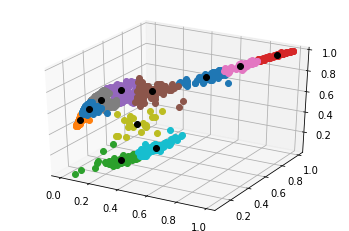


Plot of cluster number 1

(30, 40, 3)


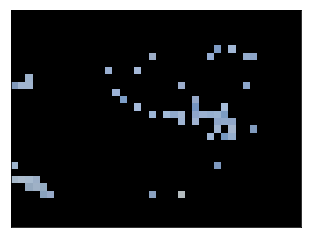


Plot of cluster number 2

(30, 40, 3)


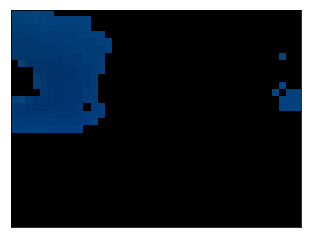


Plot of cluster number 3

(30, 40, 3)


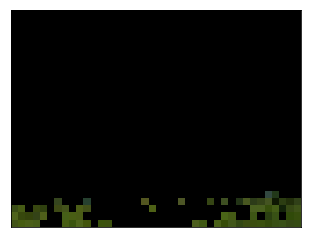


Plot of cluster number 4

(30, 40, 3)


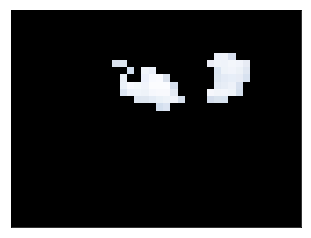


Plot of cluster number 5

(30, 40, 3)


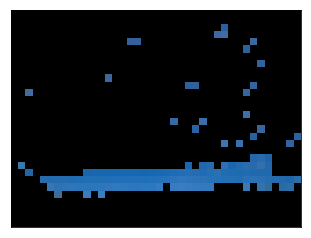


Plot of cluster number 6

(30, 40, 3)


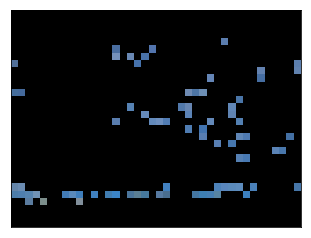


Plot of cluster number 7

(30, 40, 3)


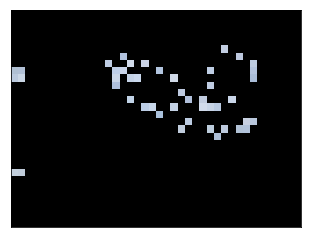


Plot of cluster number 8

(30, 40, 3)


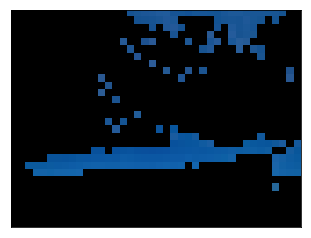


Plot of cluster number 9

(30, 40, 3)


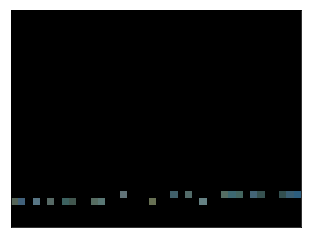


Plot of cluster number 10

(30, 40, 3)


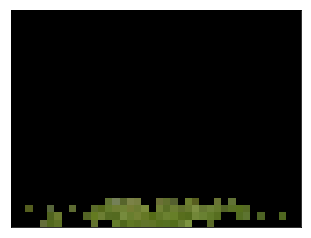


Plot of cluster number 11

(30, 40, 3)


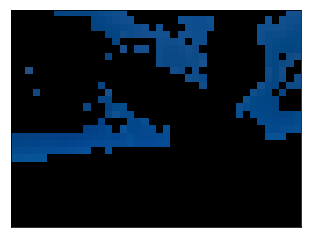



---------- Error:  4.257235475181 








---------- ---------- ---------- ---------- ----------


CLUSTERING WITH 12 CLUSTERS:

12
Clusters centroids are:
 [[0.28111455 0.39613003 0.41181631]
 [0.03584087 0.29154223 0.54343514]
 [0.75828527 0.8115148  0.88942714]
 [0.16521451 0.43227186 0.69155978]
 [0.59574547 0.68325934 0.80061043]
 [0.20607009 0.28130997 0.07999583]
 [0.31363471 0.39126725 0.11750182]
 [0.07982769 0.34868786 0.61375025]
 [0.0117549  0.22939216 0.46019608]
 [0.91982026 0.9395915  0.97163399]
 [0.41288515 0.48205282 0.20080032]
 [0.33929309 0.50090299 0.68271414]]


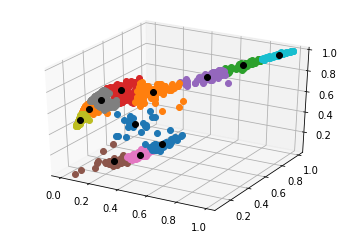


Plot of cluster number 1

(30, 40, 3)


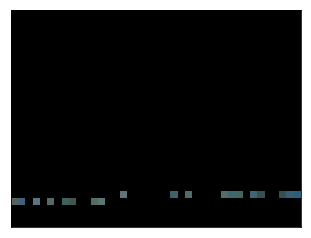


Plot of cluster number 2

(30, 40, 3)


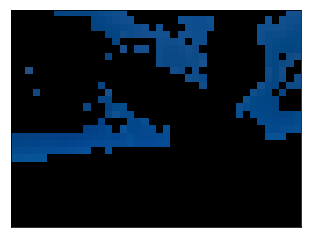


Plot of cluster number 3

(30, 40, 3)


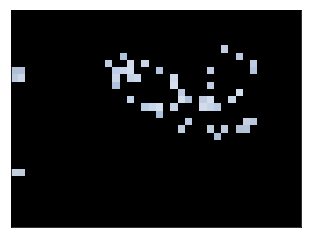


Plot of cluster number 4

(30, 40, 3)


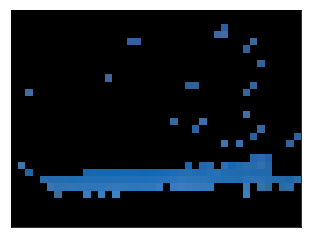


Plot of cluster number 5

(30, 40, 3)


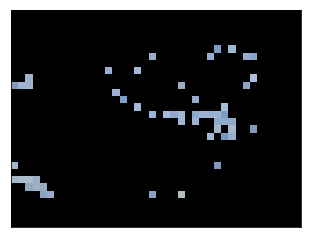


Plot of cluster number 6

(30, 40, 3)


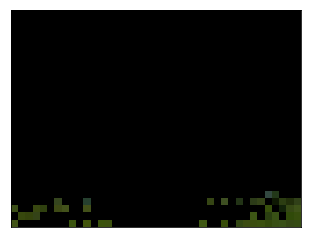


Plot of cluster number 7

(30, 40, 3)


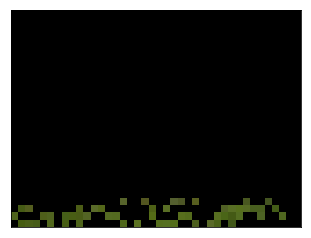


Plot of cluster number 8

(30, 40, 3)


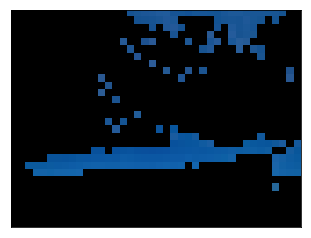


Plot of cluster number 9

(30, 40, 3)


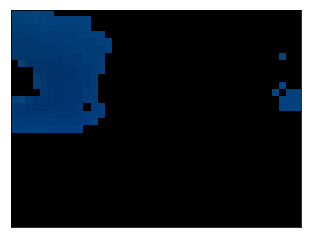


Plot of cluster number 10

(30, 40, 3)


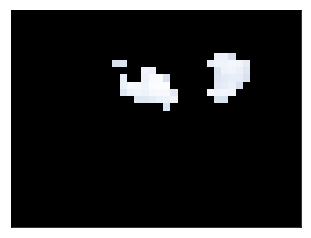


Plot of cluster number 11

(30, 40, 3)


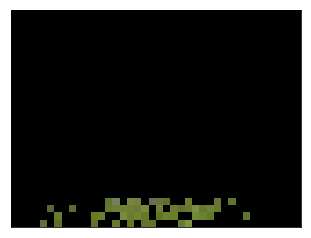


Plot of cluster number 12

(30, 40, 3)


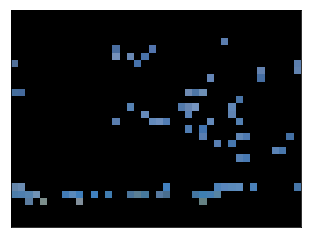



---------- Error:  3.80608305778385 








---------- ---------- ---------- ---------- ----------


CLUSTERING WITH 13 CLUSTERS:

13
Clusters centroids are:
 [[0.07793414 0.34296369 0.60664697]
 [0.91182412 0.93348188 0.96773619]
 [0.31363471 0.39126725 0.11750182]
 [0.59684737 0.68369858 0.80042291]
 [0.03274186 0.28874575 0.54013936]
 [0.01171969 0.22868647 0.45938876]
 [0.25831071 0.46420814 0.68190045]
 [0.38735055 0.52943568 0.69791966]
 [0.28705882 0.40171569 0.41696078]
 [0.41288515 0.48205282 0.20080032]
 [0.74678176 0.80213129 0.88346121]
 [0.20607009 0.28130997 0.07999583]
 [0.14140007 0.42204162 0.68844169]]


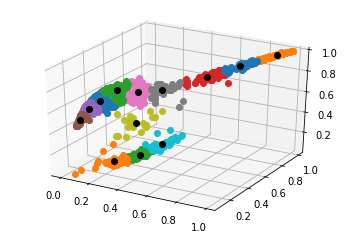


Plot of cluster number 1

(30, 40, 3)


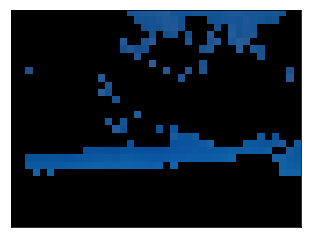


Plot of cluster number 2

(30, 40, 3)


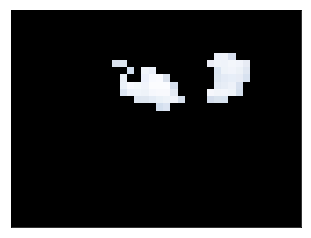


Plot of cluster number 3

(30, 40, 3)


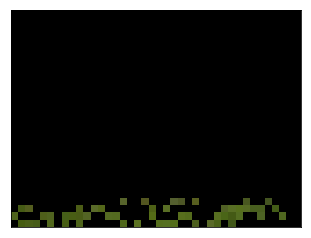


Plot of cluster number 4

(30, 40, 3)


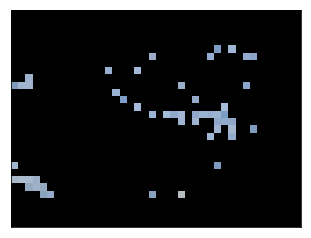


Plot of cluster number 5

(30, 40, 3)


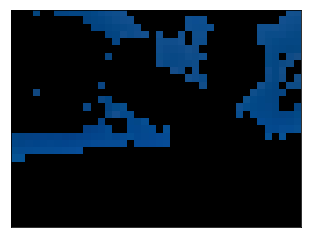


Plot of cluster number 6

(30, 40, 3)


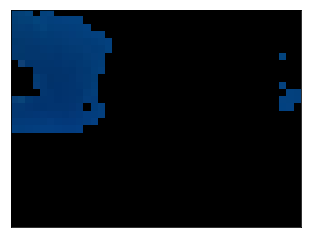


Plot of cluster number 7

(30, 40, 3)


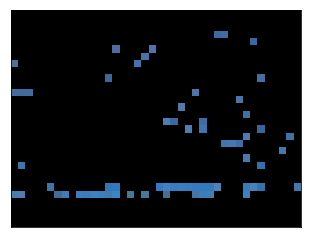


Plot of cluster number 8

(30, 40, 3)


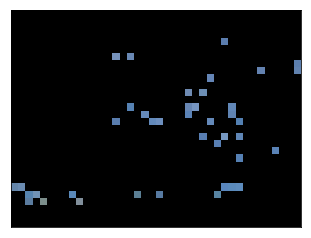


Plot of cluster number 9

(30, 40, 3)


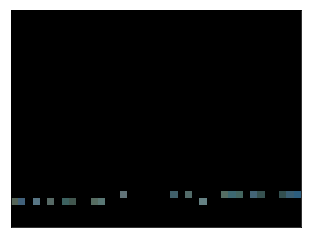


Plot of cluster number 10

(30, 40, 3)


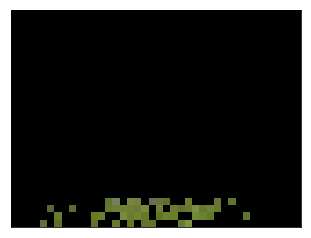


Plot of cluster number 11

(30, 40, 3)


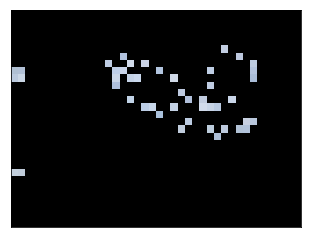


Plot of cluster number 12

(30, 40, 3)


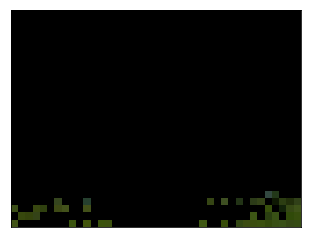


Plot of cluster number 13

(30, 40, 3)


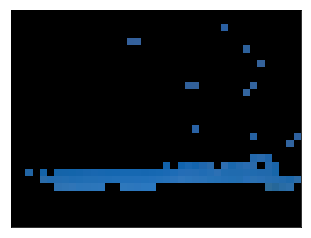



---------- Error:  3.4158164328688776 








---------- ---------- ---------- ---------- ----------


CLUSTERING WITH 14 CLUSTERS:

14
Clusters centroids are:
 [[0.41382761 0.48284314 0.20189951]
 [0.14645917 0.43088711 0.69975252]
 [0.62289397 0.70377633 0.81310821]
 [0.02869367 0.28562521 0.5373366 ]
 [0.92902331 0.94685535 0.97628561]
 [0.20708742 0.28259804 0.08041258]
 [0.40809991 0.54472456 0.71414566]
 [0.78221569 0.8305098  0.90237255]
 [0.10660347 0.33336574 0.57461514]
 [0.26653691 0.46045271 0.66826701]
 [0.29282766 0.40330237 0.4127967 ]
 [0.01161946 0.22759622 0.4579002 ]
 [0.05265423 0.3525267  0.63354854]
 [0.31572259 0.39313725 0.11839143]]


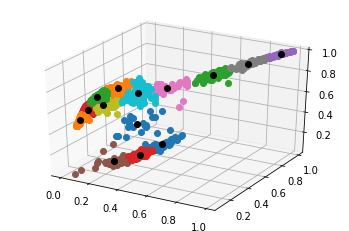


Plot of cluster number 1

(30, 40, 3)


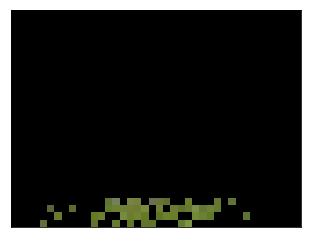


Plot of cluster number 2

(30, 40, 3)


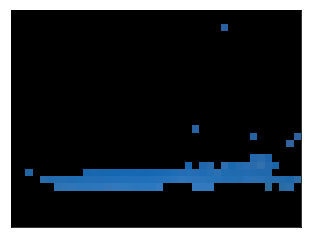


Plot of cluster number 3

(30, 40, 3)


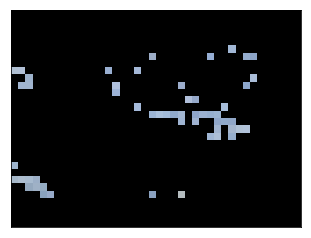


Plot of cluster number 4

(30, 40, 3)


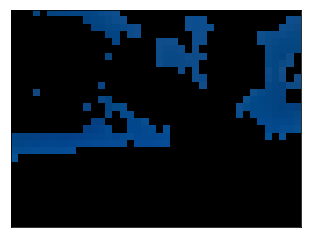


Plot of cluster number 5

(30, 40, 3)


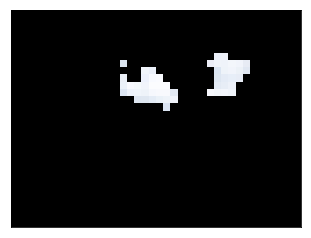


Plot of cluster number 6

(30, 40, 3)


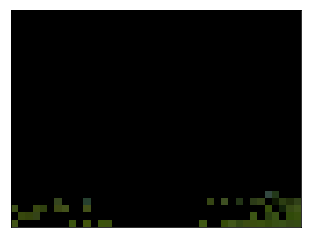


Plot of cluster number 7

(30, 40, 3)


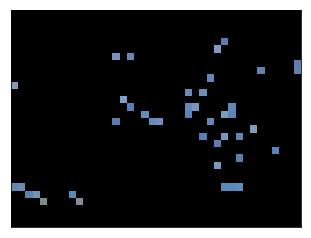


Plot of cluster number 8

(30, 40, 3)


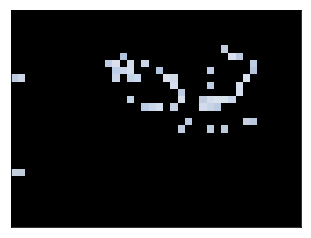


Plot of cluster number 9

(30, 40, 3)


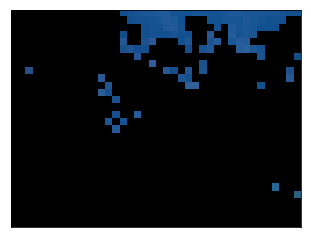


Plot of cluster number 10

(30, 40, 3)


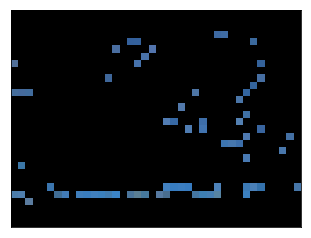


Plot of cluster number 11

(30, 40, 3)


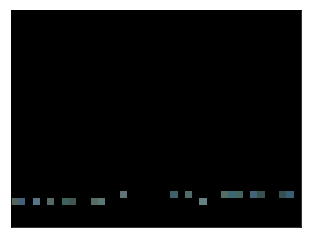


Plot of cluster number 12

(30, 40, 3)


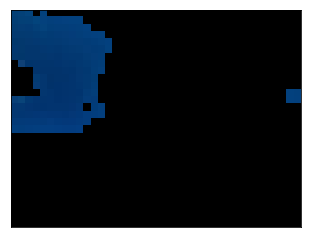


Plot of cluster number 13

(30, 40, 3)


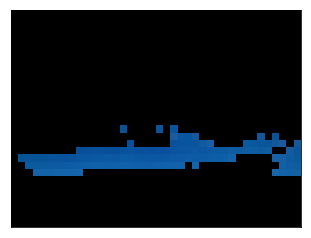


Plot of cluster number 14

(30, 40, 3)


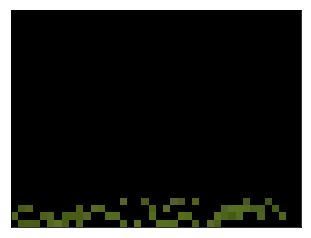



---------- Error:  3.0258700947602364 








---------- ---------- ---------- ---------- ----------


CLUSTERING WITH 15 CLUSTERS:

15
Clusters centroids are:
 [[0.20607009 0.28130997 0.07999583]
 [0.14437512 0.43072886 0.70113884]
 [0.83406863 0.87303922 0.93045343]
 [0.02869367 0.28562521 0.5373366 ]
 [0.41288515 0.48205282 0.20080032]
 [0.38420232 0.52762923 0.69458556]
 [0.10660347 0.33336574 0.57461514]
 [0.5877342  0.67647059 0.79738562]
 [0.05265423 0.3525267  0.63354854]
 [0.72063606 0.78132473 0.86635581]
 [0.93971678 0.95474946 0.98119826]
 [0.01161946 0.22759622 0.4579002 ]
 [0.28687364 0.39749455 0.40713508]
 [0.31363471 0.39126725 0.11750182]
 [0.25485671 0.45472097 0.66906486]]


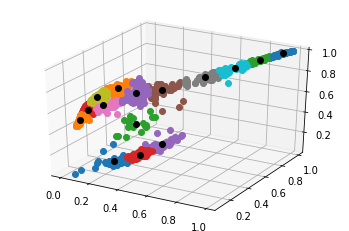


Plot of cluster number 1

(30, 40, 3)


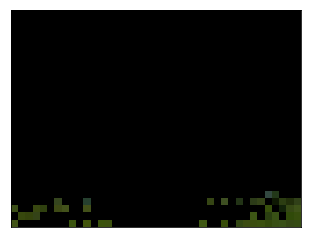


Plot of cluster number 2

(30, 40, 3)


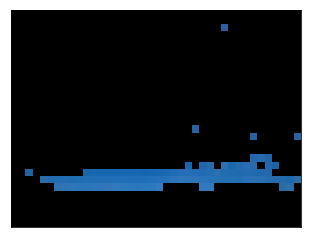


Plot of cluster number 3

(30, 40, 3)


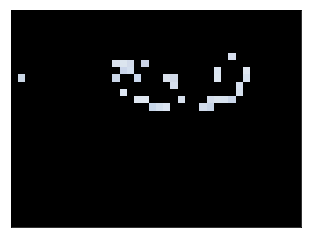


Plot of cluster number 4

(30, 40, 3)


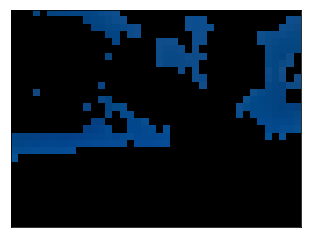


Plot of cluster number 5

(30, 40, 3)


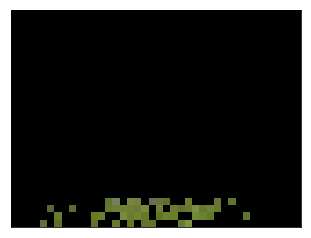


Plot of cluster number 6

(30, 40, 3)


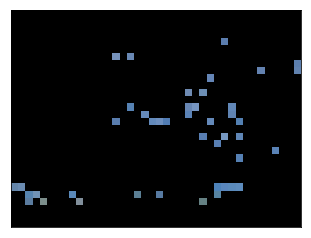


Plot of cluster number 7

(30, 40, 3)


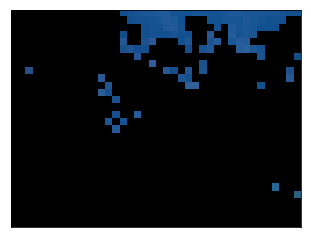


Plot of cluster number 8

(30, 40, 3)


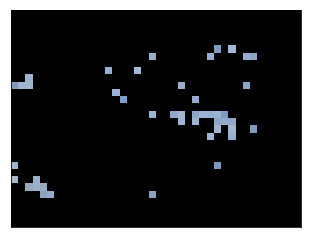


Plot of cluster number 9

(30, 40, 3)


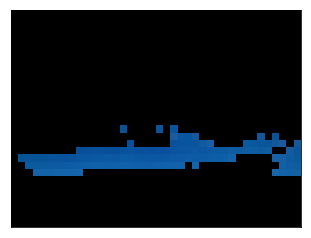


Plot of cluster number 10

(30, 40, 3)


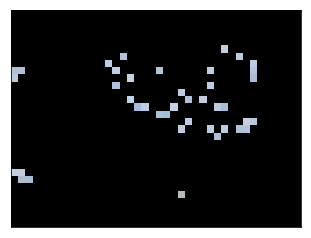


Plot of cluster number 11

(30, 40, 3)


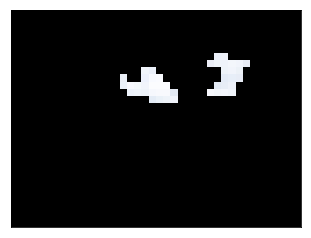


Plot of cluster number 12

(30, 40, 3)


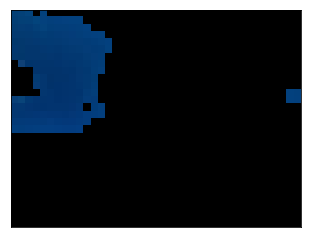


Plot of cluster number 13

(30, 40, 3)


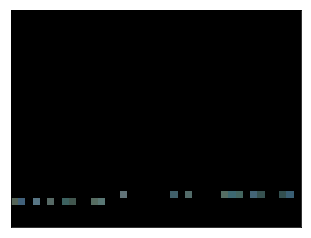


Plot of cluster number 14

(30, 40, 3)


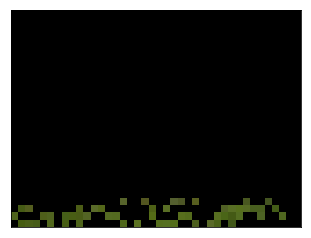


Plot of cluster number 15

(30, 40, 3)


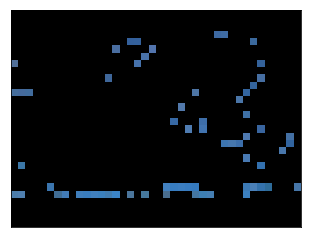



---------- Error:  2.7935574830067 






In [16]:
landscape_rescaled = rescale(landscape, 1.0 / 8.0)
print(landscape_rescaled.shape)
data_rescaled = landscape_rescaled.reshape(landscape_rescaled.shape[0]*landscape_rescaled.shape[1], 3)
print(data_rescaled.shape)

#ADD YOUR CODE HERE

# Building errors array
errors_land = []

for k in range(2, 16):
    
    print("\n\n\n\n---------- ---------- ---------- ---------- ----------\n\n")
    
    print("CLUSTERING WITH " + str(k) + " CLUSTERS:" + "\n")

    kmeans = KMeans(n_clusters=k, n_init=10)
    res = kmeans.fit(data_rescaled)
    
    # Copying and modifying previous code to plot
    
    # Clusters to plot COLORED 3-D clusters
    clusters_land = [[] for i in range(k)]
    print(len(clusters_land))

    # Clusters to plot IMAGE clusters
    clusters_land_plot = [data_rescaled.copy() for i in range(k)]

    for index in range(len(res.labels_)):
        # Building clusters lists to plot colors clusters
        clusters_land[res.labels_[index]].append(data_rescaled[index])

        # Building image clusters to be plotted
        # ASSUMING THE LABELS ARE IN THE SAME ORDER W.R.T. THE LABELLED POINTS
        for label in range(k):
            if res.labels_[index] != label:
                clusters_land_plot[label][index] = [0., 0., 0.]

    
    
    # PLOTTING 3-D COLORED CLUSTERS AND CENTROIDS
    
    fig = pyplot.figure()
    axis = fig.add_subplot(1, 1, 1, projection="3d")
    #colors = ["#ff0000", "#ffff00", "#0000ff", "#00ff00", "#ff00ff", "#00ffff", "#ff8800", "#ff6666"]

    # Preparing vectors to plot
    r_plot = []
    g_plot = []
    b_plot = []

    for i in range(len(clusters_land)):
        r_plot.append([])
        g_plot.append([])
        b_plot.append([])

    for cluster_cont in range(len(clusters_land)):
        for i in range(len(clusters_land[cluster_cont])):
            r_plot[cluster_cont].append(clusters_land[cluster_cont][i][0])
            g_plot[cluster_cont].append(clusters_land[cluster_cont][i][1])
            b_plot[cluster_cont].append(clusters_land[cluster_cont][i][2])

    # plotting colors clusters
    for cluster_cont in range(len(clusters_land)):
        axis.plot(r_plot[cluster_cont], g_plot[cluster_cont], b_plot[cluster_cont], 'o')

    # Plotting centroids
    print("Clusters centroids are:\n", res.cluster_centers_)
    # Creating centroids coordinates lists: for z coordinate the function plot makes confusions with z coordinates
    x_cent, y_cent, z_cent = [], [], []
    for point in res.cluster_centers_:
        x_cent.append(point[0])
        y_cent.append(point[1])
        z_cent.append(point[2])

    axis.plot(x_cent, y_cent, z_cent, 'ko')

    plt.show()
    
    
    
    # PLOTTING IMAGE CLUSTERS
                
    for i in range(k):
        
        print("\n" + "Plot of cluster number " + str(i+1) + "\n")
        
        clusters_land_plot[i] = clusters_land_plot[i].reshape(30, 40, 3)
                
        print(clusters_land_plot[i].shape)
        ax = plt.axes(xticks=[], yticks=[])
        ax.imshow(clusters_land_plot[i]);
        plt.show()
    
    # PRINTING ERRORS
    print("\n\n---------- Error: ", res.inertia_, "\n\n\n\n")
    
    errors_land.append(res.inertia_)

## TO DO 9:

Plot for different values of k (e.g. k in range(2,15)) the respective error of the kmeans algorithm 

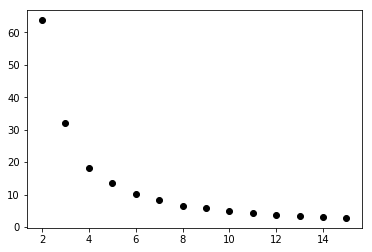

In [17]:
#ADD CODE FOR PLOTTING HERE

# N.B.: DO NOT CONFUSE: ON X AXIS THERE ARE NOT THE NUMBERS OF ITERATIONS BUT THE NUMBER OF CLUSTERS

plt.plot(range(2, 16), errors_land, 'ko')
plt.show()

A possible way to exploit the error curve in order to set the number of clusters is to apply the "Elbow rule", explained below: 

(explanation from Wikipedia)

The Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset.

This method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. More precisely, if one plots the percentage of variance explained by the clusters against the number of clusters, the first clusters will add much information (explain a lot of variance), but at some point the marginal gain will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion". This "elbow" cannot always be unambiguously identified. Percentage of variance explained is the ratio of the between-group variance to the total variance, also known as an F-test. A slight variation of this method plots the curvature of the within group variance.

##  Question 4:

Compare the results with different values of k, what do you observe? 

Analyze also the error, which one do you think is the optimal value of k ?

Is there a single, clear answer ? 

Which value of k would you choose by applying the "Elbow rule"? Explain why.

### Answer

For different k one can see that the clusters in the image become smaller but "cooler" (I mean, more "significant", more "satisfying" in a certain sense) untill they become "too many"; of course these are not formal statements, but observing the images I think one can understand better what I mean.

Analyzing the **IMAGE CLUSTERS** I think the best value of k is 3 or 4.

Analyzing the **ERRORS** I think the best value of k is 3. (I should check this in the code below)

There are no "optimal" values of k, in the sense that the choice can depend on the percentage of variance chosen. Also, the choice can depend on the "common sense" of the user, in the sense that the percentage of variance can be "optimal" for high number of clusters, but if they have "no meaning" compared to the initial image that rule is useless (with the chosen parameter in that case).

[31.75469498972691, 13.733700828019511, 4.650893789761092, 3.3242559719508726, 2.0304677092549586, 1.6758169542303554, 0.8561220654155735, 0.718890796054751, 0.7276066193947024, 0.4511524173971502, 0.3902666249149722, 0.3899463381086412, 0.23231261175353657]


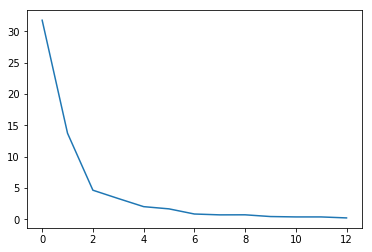

In [27]:
percent_var = []
num_clusters = 0
percent_limit = 0.05
for i in range(len(errors_land) - 1):
    percent_var.append((errors_land[i] - errors_land[i+1]))
    # percent_var.append((errors_land[i] - errors_land[i+1])/errors_land[i])
    
    # Saving the first number of clusters that is ok and then exit the loop
    if percent_var[i]<percent_limit:
        num_clusters = i+2
        break

print(percent_var)

plt.plot(percent_var)
plt.show()

# previous check...
# now deprecated
#if num_clusters != 0:
#    print("\nThe optimal number of clusters with percentage of variance = ", percent_limit," is: ", num_clusters)
#else:
#    print("\nThere are no number of clusters that satisfy the required condition: please change the \"percentage_var\" parameter or change the number of clusters.")

## Linkage-based clustering

The second part of the assignment concern instead linkage-based clustering. We will use the AgglomerativeClustering module of sklearn. 

In [19]:
# Import required packages
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics, datasets
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# Load sample data
data = np.load('data/circle_data.npz')
X = data['X']
labels_true = data['labels_true']

## TO DO 10: 

Now exploit the AgglomerativeClustering algorithm on the provided sample data points. Use the "single" linkage type that correspond to the minimum distance criteria seen in the lectures and 2 clusters. Notice that the "single" option has been introduced recently in sklearn, if you get an error ensure you have a recent version of the library. Plot the resulting clustering.

In [20]:
# Compute Agglomerative Clustering

n_cluster_agglo = 2

ac = AgglomerativeClustering(n_clusters=n_cluster_agglo, linkage="single")

#ADD YOUR CODE

res_agglo = ac.fit(X)

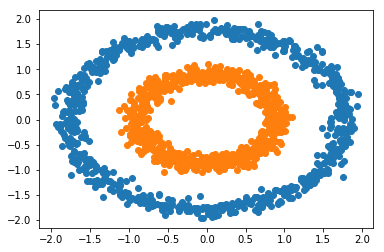

In [21]:
# Plot result

#ADD CODE FOR PLOTTING HERE

clusters_agglo = [[] for i in range(n_cluster_agglo)]

for index in range(len(res_agglo.labels_)):
    # Building clusters lists to plot colors clusters
    clusters_agglo[res_agglo.labels_[index]].append(X[index])


fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1)

# Preparing arrays to plot (I could not find the way to slice...)
x_plot, y_plot = [[[] for i in range(len(clusters_agglo))] for i in range(2)]

for i in range(len(clusters_agglo)):
    for point in clusters_agglo[i]:
        x_plot[i].append(point[0])
        y_plot[i].append(point[1])
        
# plotting clusters
for cluster_cont in range(len(clusters_agglo)):
    axis.plot(x_plot[cluster_cont], y_plot[cluster_cont], 'o')

plt.show()

#plt.scatter(X[:,0], X[:,1], c = labels_true) # didnt notice this was the easier way...

## TO DO 11: 

Now try the KMeans with two clusters on the same dataset we used for the AgglomerativeClustering algorithm.

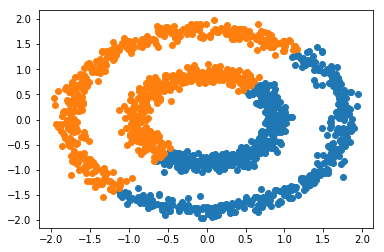

In [22]:
#ADD YOUR CODE HERE

kmeans_circle = KMeans(n_clusters=n_cluster_agglo, n_init=10)

res_agglo = kmeans_circle.fit(X)

#ADD CODE FOR PLOTTING HERE

clusters_agglo = [[] for i in range(n_cluster_agglo)]

for index in range(len(res_agglo.labels_)):
    # Building clusters lists to plot colors clusters
    clusters_agglo[res_agglo.labels_[index]].append(X[index])


fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1)

# Preparing arrays to plot (I could not find the way to slice...)
x_plot, y_plot = [[[] for i in range(len(clusters_agglo))] for i in range(2)]

for i in range(len(clusters_agglo)):
    for point in clusters_agglo[i]:
        x_plot[i].append(point[0])
        y_plot[i].append(point[1])
        
# plotting clusters
for cluster_cont in range(len(clusters_agglo)):
    axis.plot(x_plot[cluster_cont], y_plot[cluster_cont], 'o')

plt.show()

## Question 5:

Compare the results of K-means and Agglomerative Clustering and explain what you observe



One can notice that the agglomerative clustering obtains "more precise" results.

This is due to the fact that the kmeans centres splits the data in 2 (or more, it depends on the choice of the number of the initial clusters...) sets, so the "natural/intuitive" division is "misunderstood" by this algorithm, which leads to the shown results (that, as said before, is not "intuitive").